In [249]:
# First let's import the packages we will use in this project
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets, linear_model, model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

pd.set_option('display.max_columns', None)

# Read data

df = pd.read_csv(r'C:\Users\franc\OneDrive\Escritorio\Cancer_Data.csv', sep=';')

In [250]:
# Let's take a look at the data

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [251]:
# Important information about the data

df.drop ('id', axis = 1).describe().drop('count', axis =0)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [252]:
# DATA CLEANING:
# Let's see if there is missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,round(pct_missing*100)))
    
# 0% of missing data in every column 

id - 0%
diagnosis - 0%
radius_mean - 0%
texture_mean - 0%
perimeter_mean - 0%
area_mean - 0%
smoothness_mean - 0%
compactness_mean - 0%
concavity_mean - 0%
concave points_mean - 0%
symmetry_mean - 0%
fractal_dimension_mean - 0%
radius_se - 0%
texture_se - 0%
perimeter_se - 0%
area_se - 0%
smoothness_se - 0%
compactness_se - 0%
concavity_se - 0%
concave points_se - 0%
symmetry_se - 0%
fractal_dimension_se - 0%
radius_worst - 0%
texture_worst - 0%
perimeter_worst - 0%
area_worst - 0%
smoothness_worst - 0%
compactness_worst - 0%
concavity_worst - 0%
concave points_worst - 0%
symmetry_worst - 0%
fractal_dimension_worst - 0%


In [253]:
# Data types for columns
print(df.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

<Axes: >

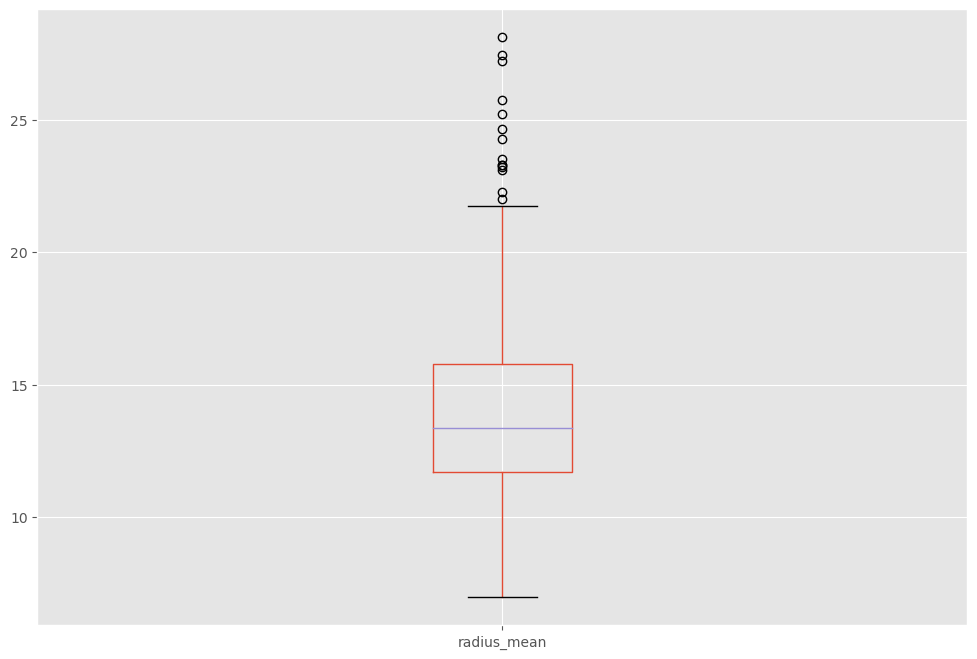

In [254]:
# Now let's check if there are any Outliers on some important data
df.boxplot(column = ['radius_mean'])

<Axes: >

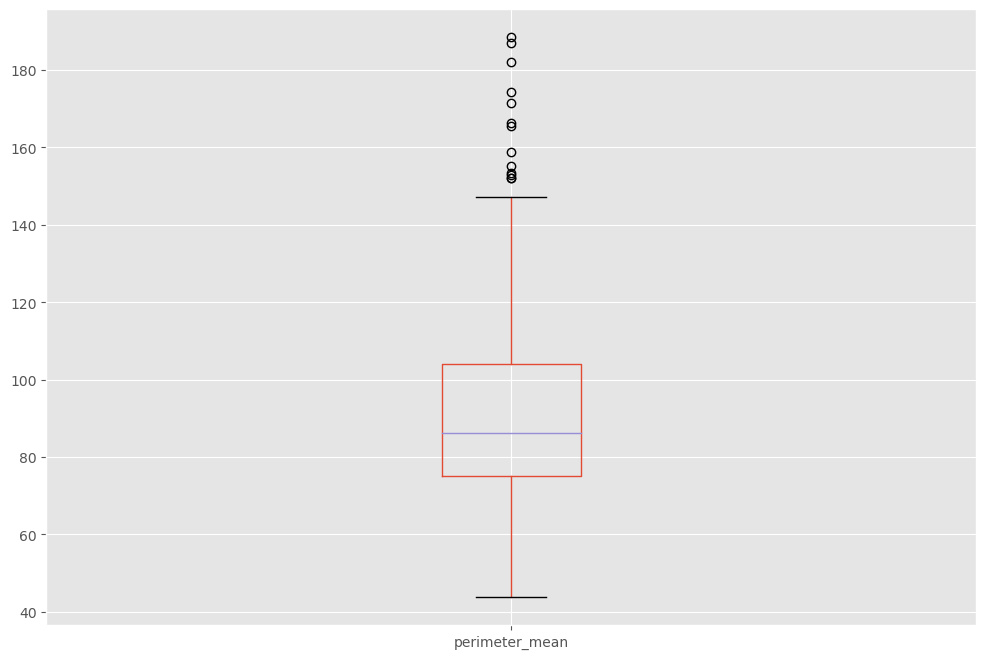

In [255]:
df.boxplot(column = ['perimeter_mean'])

In [256]:
# Is there duplicate data?
df.drop_duplicates().head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [257]:
# In order to verify if the column of diagnosis have only two values (M or B)
# first we must "numerize" that column

df_numerized = df

df_numerized['diagnosis'] = df_numerized['diagnosis'].astype('category')
df_numerized['diagnosis'] = df_numerized['diagnosis'].cat.codes

df_numerized.head()

# So in this case "1" means "M (Malignant cancer)" and "0" means "B (Benign cancer)"

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [258]:
# Cheking that the only to possible values on the diagnosis are 1 or 0
error = 0

for row in df['diagnosis']:
    if (row != 1 and row != 0): error += 1
        
error

0

In [259]:
# Sorting the data by its diagnosis
df_numerized.sort_values(by = ['diagnosis'], inplace = False, ascending = False).head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.1184,0.2776,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
210,881046502,1,20.58,22.14,134.70,1290.0,0.0909,0.1348,0.1640,0.09561,0.1765,0.05024,0.8601,1.4800,7.029,111.70,0.008124,0.03611,0.05489,0.02765,0.03176,0.002365,23.24,27.84,158.3,1656.0,0.1178,0.2920,0.3861,0.1920,0.2909,0.05865
190,874858,1,14.22,23.12,94.37,609.9,0.1075,0.2413,0.1981,0.06618,0.2384,0.07542,0.2860,2.1100,2.112,31.72,0.007970,0.13540,0.11660,0.01666,0.05113,0.011720,15.74,37.18,106.4,762.4,0.1533,0.9327,0.8488,0.1772,0.5166,0.14460
193,875263,1,12.34,26.86,81.15,477.4,0.1034,0.1353,0.1085,0.04562,0.1943,0.06937,0.4053,1.8090,2.642,34.44,0.009098,0.03845,0.03763,0.01321,0.01878,0.005672,15.65,39.34,101.7,768.9,0.1785,0.4706,0.4425,0.1459,0.3215,0.12050
194,87556202,1,14.86,23.21,100.40,671.4,0.1044,0.1980,0.1697,0.08878,0.1737,0.06672,0.2796,0.9622,3.591,25.20,0.008081,0.05122,0.05551,0.01883,0.02545,0.004312,16.08,27.78,118.6,784.7,0.1316,0.4648,0.4589,0.1727,0.3000,0.08701


<Axes: xlabel='diagnosis', ylabel='radius_mean'>

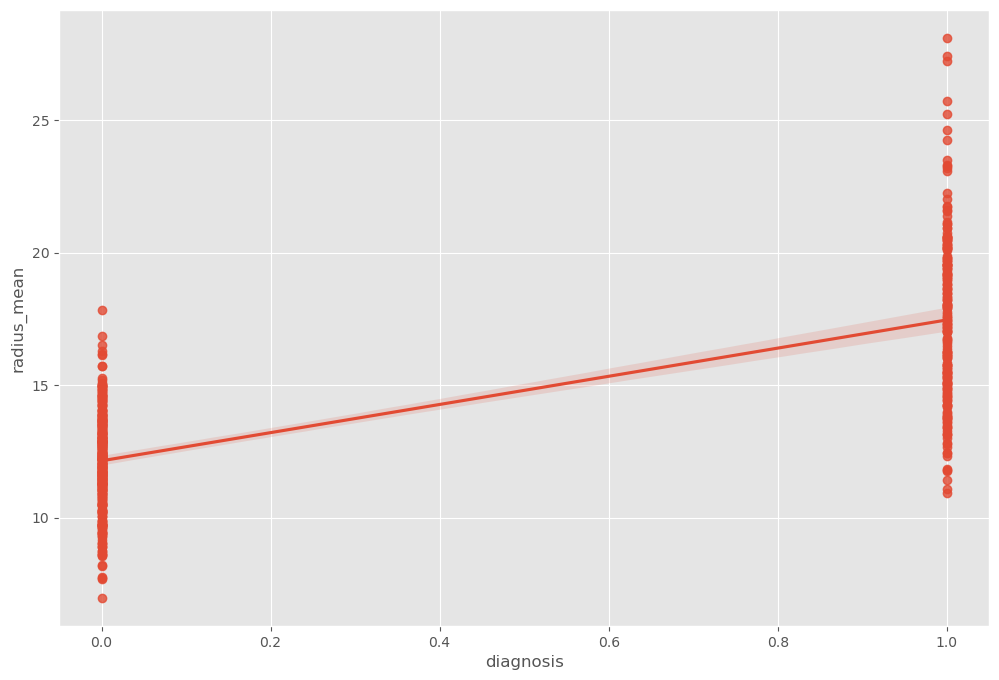

In [260]:
# CORRELATION DATA:

# Let's check that radius and perimeter of the cancer is related to its diagnosis as we could forecast.

sns.regplot(x = 'diagnosis', y = 'radius_mean', data = df_numerized )

In [261]:
# As we saw in the last picture, the more radius mean of the cancer the more likely it is to turn out Malignant cancer


<Axes: xlabel='diagnosis', ylabel='perimeter_mean'>

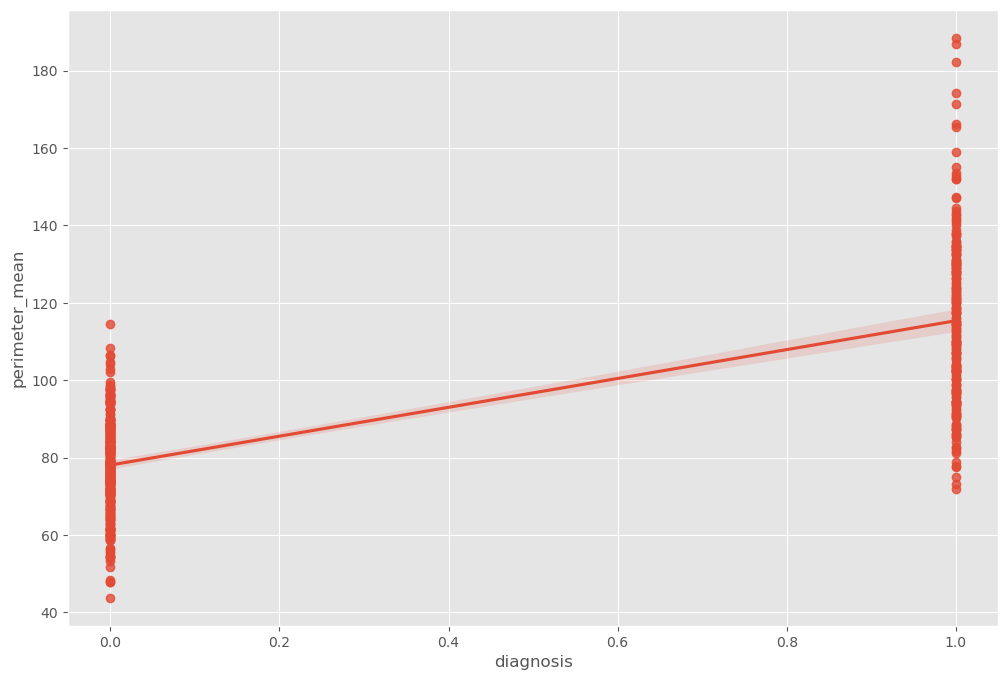

In [262]:
sns.regplot(x = 'diagnosis', y = 'perimeter_mean', data = df_numerized )

In [263]:
# Same happends with perimeter mean

In [264]:
# Correlation Matrix between all columns acording to three different methods:
# PEARSON

df_numerized.corr(method = 'pearson') 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511,0.143048,-0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,-0.017306,0.025725,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


In [265]:
# KENDALL
df_numerized.corr(method = 'kendall')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,-0.065268,0.029641,0.082348,0.029287,0.028958,-0.049773,-0.001027,0.001257,-0.002451,0.000223,-0.058586,-0.011542,0.019942,0.001034,0.002804,0.012489,0.025455,0.018670,0.010642,-0.019548,-0.013925,0.019044,0.051211,0.019707,0.017681,-0.054819,-0.007514,-0.007540,-0.006402,-0.046924,-0.060670
diagnosis,-0.065268,1.000000,0.599082,0.377644,0.611775,0.599992,0.304033,0.497971,0.599449,0.635873,0.271924,-0.021173,0.504197,0.015872,0.515243,0.583722,-0.042656,0.311115,0.384486,0.399546,-0.075451,0.164674,0.644195,0.389654,0.650879,0.643117,0.347952,0.495958,0.576907,0.639090,0.324380,0.254571
radius_mean,0.029641,0.599082,1.000000,0.229159,0.963320,0.985565,0.099549,0.340020,0.465087,0.566917,0.081502,-0.246220,0.384712,-0.095861,0.398999,0.549079,-0.226065,0.181153,0.255945,0.286742,-0.168407,-0.005832,0.882063,0.210302,0.862763,0.882035,0.082284,0.332970,0.421100,0.532569,0.114141,0.024103
texture_mean,0.082348,0.377644,0.229159,1.000000,0.234353,0.230829,0.017135,0.184220,0.236079,0.209629,0.075493,-0.039255,0.247098,0.309294,0.264142,0.270659,0.024484,0.180535,0.197820,0.162570,0.007114,0.099663,0.246993,0.741293,0.254406,0.248096,0.069336,0.199777,0.235242,0.217743,0.081482,0.078289
perimeter_mean,0.029287,0.611775,0.963320,0.234353,1.000000,0.956965,0.122434,0.375540,0.497587,0.596716,0.101781,-0.214661,0.393716,-0.091170,0.414246,0.557127,-0.215165,0.211562,0.283680,0.310856,-0.158856,0.021156,0.886941,0.216032,0.881245,0.885246,0.102428,0.365026,0.449549,0.559819,0.130283,0.053103
area_mean,0.028958,0.599992,0.985565,0.230829,0.956965,1.000000,0.092541,0.333534,0.461843,0.561760,0.076963,-0.252131,0.387101,-0.094179,0.400951,0.552309,-0.226658,0.177378,0.254040,0.283280,-0.169859,-0.008733,0.883811,0.212051,0.863409,0.885906,0.077793,0.328257,0.418822,0.528375,0.112032,0.020265
smoothness_mean,-0.049773,0.304033,0.099549,0.017135,0.122434,0.092541,1.000000,0.491072,0.364105,0.398511,0.381515,0.417070,0.223561,0.061806,0.220743,0.196414,0.230123,0.274218,0.247024,0.305479,0.101045,0.286167,0.136219,0.041361,0.152343,0.128881,0.608475,0.335814,0.300847,0.349195,0.270602,0.357792
compactness_mean,-0.001027,0.497971,0.340020,0.184220,0.375540,0.333534,0.491072,1.000000,0.719194,0.653022,0.392366,0.345923,0.351001,0.032274,0.409292,0.372483,0.084992,0.619218,0.570663,0.537138,0.066251,0.437206,0.372046,0.174449,0.412628,0.363980,0.412274,0.724842,0.647942,0.633090,0.312991,0.498231
concavity_mean,0.001257,0.599449,0.465087,0.236079,0.497587,0.461843,0.364105,0.719194,1.000000,0.775266,0.311354,0.173476,0.405383,0.035346,0.459626,0.460080,0.048788,0.559088,0.678378,0.581517,0.015244,0.351399,0.492914,0.227797,0.531750,0.488281,0.338902,0.654070,0.787870,0.734047,0.263490,0.377455
concave points_mean,-0.002451,0.635873,0.566917,0.209629,0.596716,0.561760,0.398511,0.653022,0.775266,1.000000,0.291970,0.094885,0.454104,0.005238,0.490678,0.532389,0.012047,0.427162,0.497183,0.568956,-0.019819,0.254332,0.590400,0.200509,0.620728,0.583169,0.339906,0.557303,0.635728,0.783933,0.240447,0.285028


In [266]:
# SPEARMAN
df_numerized.corr(method = 'spearman')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,-0.079866,0.043740,0.125809,0.043374,0.042829,-0.073225,-0.002247,0.000657,-0.003174,-0.001102,-0.087017,-0.016157,0.032837,0.002656,0.002448,0.020673,0.037236,0.029344,0.016625,-0.028736,-0.020282,0.025451,0.077484,0.026199,0.023137,-0.080853,-0.011300,-0.013284,-0.012798,-0.064977,-0.090637
diagnosis,-0.079866,1.000000,0.732785,0.461971,0.748496,0.734122,0.371892,0.609288,0.733308,0.777877,0.332567,-0.025903,0.616912,0.019419,0.630411,0.714184,-0.052193,0.380666,0.470338,0.488717,-0.092303,0.201492,0.787933,0.476720,0.796319,0.786902,0.425513,0.606810,0.705734,0.781674,0.396843,0.311477
radius_mean,0.043740,0.732785,1.000000,0.340956,0.997802,0.999602,0.148510,0.497578,0.645728,0.759702,0.120242,-0.349931,0.550247,-0.144499,0.565520,0.738077,-0.326385,0.264904,0.364555,0.410576,-0.241376,-0.008411,0.978604,0.314911,0.971555,0.978863,0.125789,0.491357,0.596043,0.727265,0.174698,0.044564
texture_mean,0.125809,0.461971,0.340956,1.000000,0.348142,0.344145,0.024649,0.266499,0.342646,0.306891,0.110130,-0.059303,0.363621,0.450720,0.386813,0.395139,0.037048,0.263591,0.287188,0.238610,0.008945,0.147605,0.366547,0.909218,0.375273,0.368335,0.101401,0.290917,0.339725,0.319235,0.120693,0.116144
perimeter_mean,0.043374,0.748496,0.997802,0.348142,1.000000,0.997068,0.182923,0.543925,0.681958,0.788629,0.150049,-0.304891,0.560326,-0.137578,0.582789,0.745824,-0.311147,0.308620,0.402277,0.441996,-0.228187,0.032429,0.981244,0.323109,0.978980,0.980864,0.156611,0.534565,0.632106,0.757526,0.199007,0.088961
area_mean,0.042829,0.734122,0.999602,0.344145,0.997068,1.000000,0.138053,0.488988,0.642557,0.755165,0.113928,-0.358425,0.553388,-0.142469,0.568237,0.741518,-0.327431,0.260362,0.362308,0.406468,-0.243507,-0.012688,0.979258,0.318178,0.971822,0.980264,0.119712,0.485813,0.593736,0.723390,0.170860,0.038758
smoothness_mean,-0.073225,0.371892,0.148510,0.024649,0.182923,0.138053,1.000000,0.678806,0.518511,0.565172,0.542228,0.588465,0.334282,0.091283,0.331360,0.296059,0.338692,0.392455,0.354730,0.438826,0.150740,0.413429,0.203453,0.060645,0.226345,0.191735,0.796085,0.481384,0.429107,0.498868,0.393579,0.511457
compactness_mean,-0.002247,0.609288,0.497578,0.266499,0.543925,0.488988,0.678806,1.000000,0.896518,0.848295,0.552203,0.499195,0.506582,0.047766,0.583520,0.539511,0.127381,0.817875,0.772283,0.732425,0.098388,0.621121,0.542626,0.255305,0.592254,0.531590,0.578902,0.901029,0.837921,0.825473,0.450333,0.688986
concavity_mean,0.000657,0.733308,0.645728,0.342646,0.681958,0.642557,0.518511,0.896518,1.000000,0.927352,0.446793,0.258174,0.575277,0.051318,0.646199,0.644344,0.070321,0.761230,0.858306,0.774656,0.022753,0.513593,0.682316,0.335866,0.722424,0.676628,0.488775,0.849985,0.938543,0.904938,0.383667,0.541838
concave points_mean,-0.003174,0.777877,0.759702,0.306891,0.788629,0.755165,0.565172,0.848295,0.927352,1.000000,0.423767,0.142659,0.635054,0.008710,0.679841,0.726982,0.016798,0.608388,0.674668,0.758438,-0.028353,0.378374,0.787411,0.300562,0.813960,0.780395,0.490035,0.758309,0.827281,0.937075,0.355477,0.421110


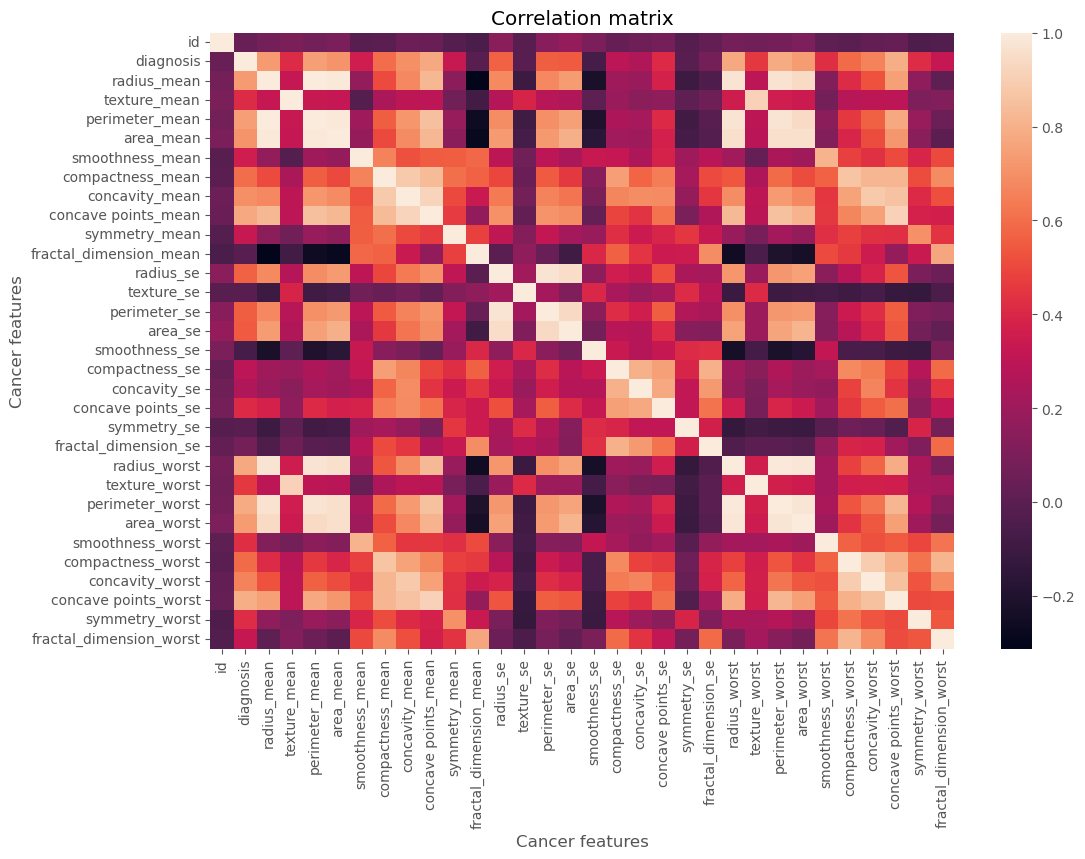

In [267]:
# In this project we will only use Pearson correlation.
# Let's see how the correlation matrix looks like

correlation_matrix = df_numerized.corr(method = 'pearson')
sns.heatmap(correlation_matrix)

plt.title("Correlation matrix")

plt.xlabel("Cancer features")

plt.ylabel("Cancer features")

plt.show()

In [268]:
# The heat map shows that the values with most correlation to the diagnosis are:
# radius,perimeter, area, concavity, concave points means and its worst versions

# We note that we forecasted that radius and perimeter should have high correlation to the diagnosis, but we discover
# that there are more correlated data

In [269]:
# Let's take a further look in the numbers of highest correlated data 

correlation_pairs = correlation_matrix.unstack()
sorted_pairs = correlation_pairs.sort_values(kind = "quicksort")
strong_pairs = sorted_pairs[abs(sorted_pairs)> 0.6]

print(strong_pairs)

concave points_se        concave points_worst       0.602450
concave points_worst     concave points_se          0.602450
compactness_mean         symmetry_mean              0.602641
symmetry_mean            compactness_mean           0.602641
concave points_se        fractal_dimension_se       0.611044
fractal_dimension_se     concave points_se          0.611044
symmetry_worst           compactness_worst          0.614441
compactness_worst        symmetry_worst             0.614441
concave points_se        concave points_mean        0.615634
concave points_mean      concave points_se          0.615634
area_se                  concavity_mean             0.617427
concavity_mean           area_se                    0.617427
fractal_dimension_worst  smoothness_worst           0.617624
smoothness_worst         fractal_dimension_worst    0.617624
perimeter_worst          concavity_worst            0.618344
concavity_worst          perimeter_worst            0.618344
concavity_mean          

In [270]:
# In particular, the highest correlation data to diagnosis are the following:

correlation_pairs = correlation_matrix.unstack()
sorted_pairs = correlation_pairs.sort_values(kind = "quicksort")
strong_pairs = sorted_pairs[abs(sorted_pairs)> 0.6]['diagnosis']

print(strong_pairs)

concavity_worst         0.659610
concavity_mean          0.696360
area_mean               0.708984
radius_mean             0.730029
area_worst              0.733825
perimeter_mean          0.742636
radius_worst            0.776454
concave points_mean     0.776614
perimeter_worst         0.782914
concave points_worst    0.793566
diagnosis               1.000000
dtype: float64


C:\Users\franc\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


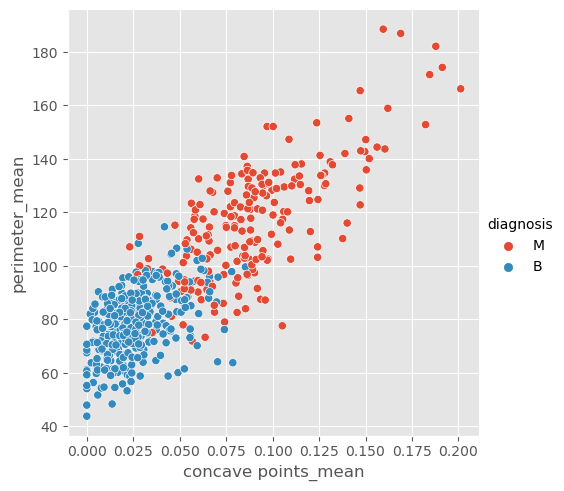

In [271]:
df = pd.read_csv(r'C:\Users\franc\OneDrive\Escritorio\Cancer_Data.csv', sep=';')
sns.relplot(data=df, x="concave points_mean", y="perimeter_mean", hue="diagnosis")

In [272]:
# MACHINE LEARNING

# First, let's define dependent and independent variables

y = df['diagnosis'] # Dependent variable
X = df.drop(['id','diagnosis'],axis =1) # Independent variables

# Then, let's split the data into a training set and testing set

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size = 0.25)

In [273]:
# Fit a logistic regression model

model = LogisticRegression(solver='lbfgs', max_iter=4000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=4000)

In [274]:
# Prediction for the test data

y_pred = model.predict(X_test)

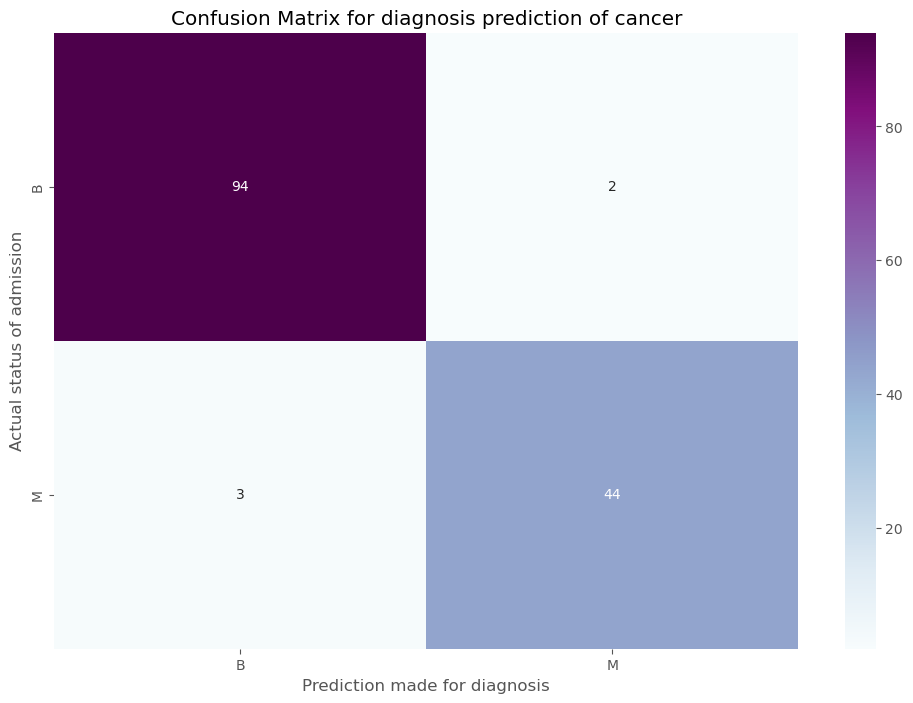

In [275]:
# Finally evaluate the model using a confusion matrix to obtain an accuracy rate

ConfusionMatrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(ConfusionMatrix, annot = True, cmap = 'BuPu')
ax.set_title('Confusion Matrix for diagnosis prediction of cancer')
ax.set_xlabel('Prediction made for diagnosis')
ax.set_ylabel('Actual status of admission')
ax.xaxis.set_ticklabels(['B','M'])
ax.yaxis.set_ticklabels(['B','M'])
plt.show()

In [276]:
# Accuracy from confusion matrix
TM = ConfusionMatrix[1,1] # True Maligne
TB = ConfusionMatrix[0,0] # True Benigne
Total = len(y_test)
print('Accuracy from confusion matrix is', (TM+TB)/Total)

Accuracy from confusion matrix is 0.965034965034965
